In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random as random
from copy import deepcopy
from tqdm import tqdm
from random import randint
matplotlib.rc("font", family="KaiTi")
matplotlib.rcParams["axes.unicode_minus"] = False

In [2]:
# Calculate the collison for each or the whole population
def precollision(swarm):
    res = 0
    for i, val in enumerate(swarm[:-1]):
        flag_d = flag_u = 0
        for j, each in enumerate(swarm[i+1:]):
            if each == val + j + 1 and flag_d == 0:
                res += 1
                flag_d = 1
            if val == each + j + 1 and flag_u == 0:
                res += 1
                flag_u = 1
            if flag_u + flag_d == 2:
                break
    return res

def collision(swarms):
    fitness = []
    opt_res = float('inf')
    opr_index = -1
    for i, each in enumerate(swarms):
        fitness.append(precollision(each))
        if fitness[-1] <= opt_res:
            opt_res = fitness[-1]
            opt_index = i
    return (fitness, opt_res, opt_index)

In [3]:
# Swarm Refinement Algorithm, refer to paper or experimental report for details
def preSwarm_refinement(n):
    lst = list(range(n))
    random.shuffle(lst)
    queen = []
    queen.append(lst[0])
    del lst[0]
    count = 0
    while len(lst) != 0 and count <= n*n:
        if queen[-1] == lst[0] + 1 or queen[-1] == lst[0] - 1:
            random.shuffle(lst)
        else:
            queen.append(lst[0])
            del lst[0]
        count += 1
    if len(lst) != 0:
        queen += lst
    return queen

def Swarm_refinement(n, nums):
    swarms = []
    for i in range(nums):
        swarms.append(preSwarm_refinement(n))
    return swarms

In [4]:
#Initialization
N = 20 # Number of Particles
d = 8 # Size of n*n chessboard
I = 50 # iterations

c1 = 0.15
c2 = 0.15
w = 1 - c1 - c2

#Metrics
avg = []
best = []

velocity = []
for i in range(N):
    lst = list(range(d))
    random.shuffle(lst)
    velocity.append(lst)
    
# Swarm refinement();
queens = Swarm_refinement(d, N)

fitness = []
opt_res = float('inf')
opt_index = -1

fitness, opt_res, opt_index = collision(queens)
best.append(opt_res)

print('Initiallization')
for queen, fit, vel in zip(queens, fitness, velocity):
    print(queen, ', fitness = ', fit, ', velocity = ', vel)
avg.append(np.mean(fitness))

# pbest
pbest = deepcopy(queens)
gbest = deepcopy(queens[opt_index])
#print('gbest = ', gbest)
    
# iteration
for iterations in tqdm(range(I)):
    
    # Update velocity
    for i in range(N):
        for j in range(d):
            velocity[i][j] = abs(round(w * velocity[i][j] + c1 * np.random.rand() * (pbest[i][j] - queens[i][j]) + c2 * np.random.rand() * (gbest[j] - queens[i][j]), 2))
    
    ggbest = np.array(gbest)
    
    #Swapping
    for i in range(N):
        queen = np.array(queens[i])
        vel = np.array(velocity[i])
        mask = np.array(vel) < random.uniform(min(velocity[i]), max(velocity[i]))

        gbest_mask = ggbest[mask]
        vel_mask = vel[mask]
        queen_mask = queen[mask]
        seq = np.argsort(-vel_mask)
        
        for j in seq:
            if queen_mask[j] != gbest_mask[j]:
                pre = precollision(list(queen))
                iq = np.where(queen == queen_mask[j])
                ib = np.where(queen == gbest_mask[j])
                queen[iq], queen[ib] = queen[ib], queen[iq]
                cur = precollision(list(queen))
                if pre <= cur:
                    queen[iq], queen[ib] = queen[ib], queen[iq]

        queens[i] = list(queen)
        
        # Update pbest
        if precollision(queens[i]) < fitness[i]:
            pbest[i] = deepcopy(queens[i])
    
    # Record the metrics
    fitness, opt_res, opt_index = collision(queens)
    avg.append(np.mean(fitness))
    best.append(opt_res)
    
    # Update gbest
    if opt_res <= precollision(gbest):
        gbest = deepcopy(queens[opt_index])

Initiallization
[3, 5, 2, 4, 7, 1, 6, 0] , fitness =  4 , velocity =  [4, 6, 2, 5, 7, 0, 1, 3]
[5, 3, 6, 2, 4, 7, 1, 0] , fitness =  4 , velocity =  [7, 2, 6, 3, 4, 5, 1, 0]
[7, 1, 3, 0, 4, 6, 2, 5] , fitness =  3 , velocity =  [3, 7, 4, 1, 6, 0, 5, 2]
[2, 7, 1, 4, 0, 3, 5, 6] , fitness =  3 , velocity =  [5, 4, 6, 7, 3, 1, 2, 0]
[1, 7, 2, 4, 6, 0, 5, 3] , fitness =  2 , velocity =  [2, 0, 5, 4, 3, 7, 1, 6]
[0, 2, 7, 4, 6, 1, 5, 3] , fitness =  3 , velocity =  [3, 1, 2, 0, 4, 7, 5, 6]
[5, 1, 4, 2, 6, 3, 0, 7] , fitness =  4 , velocity =  [7, 4, 1, 6, 5, 3, 2, 0]
[1, 4, 6, 3, 0, 2, 7, 5] , fitness =  1 , velocity =  [3, 0, 2, 5, 1, 4, 7, 6]
[7, 0, 3, 1, 6, 4, 2, 5] , fitness =  2 , velocity =  [5, 7, 4, 6, 0, 2, 3, 1]
[5, 1, 6, 4, 0, 7, 3, 2] , fitness =  1 , velocity =  [2, 7, 0, 5, 4, 3, 6, 1]
[7, 2, 4, 6, 1, 3, 0, 5] , fitness =  2 , velocity =  [1, 5, 3, 7, 2, 0, 6, 4]
[1, 4, 2, 0, 5, 3, 6, 7] , fitness =  3 , velocity =  [5, 3, 6, 7, 0, 1, 2, 4]
[4, 7, 0, 3, 5, 2, 6, 1] , fitness =

100%|█████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 129.27it/s]


In [5]:
print(avg[-1])
print(best[-1])

0.85
0


In [6]:
for queen, fit, vel in zip(queens, fitness, velocity):
    print(queen, ', fitness = ', fit, ', velocity = ', vel)
#The Results
print('Final gbest = ', gbest)

[3, 5, 0, 4, 1, 7, 2, 6] , fitness =  0 , velocity =  [0.23, 0.59, 0.8, 0.49, 1.02, 0.14, 0.47, 0.48]
[4, 1, 6, 2, 5, 7, 3, 0] , fitness =  2 , velocity =  [0.01, 0.83, 0.01, 0.21, 0.28, 0.4, 0.52, 0.67]
[7, 1, 3, 0, 6, 4, 2, 5] , fitness =  0 , velocity =  [0.02, 2.01, 0.01, 0.01, 0.01, 0.3, 1.02, 0.4]
[6, 1, 7, 4, 0, 3, 5, 2] , fitness =  1 , velocity =  [0.03, 1.17, 0.08, 0.06, 1.13, 0.13, 0.01, 0.01]
[1, 7, 2, 4, 6, 0, 3, 5] , fitness =  1 , velocity =  [0.97, 0.01, 0.28, 0.0, 0.01, 0.22, 0.63, 0.03]
[0, 7, 2, 4, 6, 1, 3, 5] , fitness =  1 , velocity =  [0.74, 0.01, 0.26, 0.04, 0.01, 0.01, 0.34, 0.2]
[4, 1, 5, 0, 6, 3, 7, 2] , fitness =  0 , velocity =  [0.01, 1.37, 0.08, 0.01, 0.01, 0.11, 0.09, 0.01]
[1, 4, 6, 3, 0, 2, 7, 5] , fitness =  1 , velocity =  [0.8, 0.35, 0.3, 0.01, 1.28, 0.12, 0.05, 0.14]
[7, 1, 3, 0, 6, 4, 2, 5] , fitness =  0 , velocity =  [0.13, 1.69, 0.01, 0.01, 0.01, 0.25, 0.89, 0.31]
[3, 1, 6, 4, 0, 7, 5, 2] , fitness =  0 , velocity =  [0.32, 1.56, 0.22, 0.23, 1.

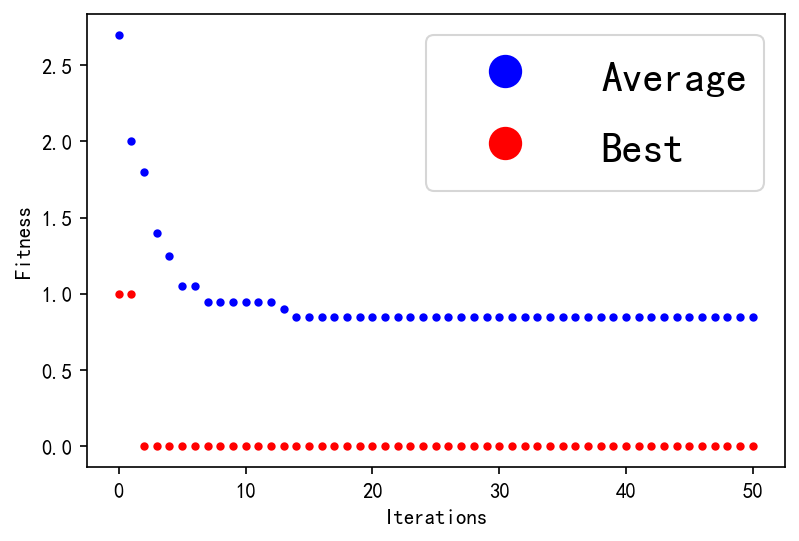

In [7]:
plt.figure(dpi = 150)
plt.plot(np.arange(I+1), avg, 'b.')
plt.plot(np.arange(I+1), best, 'r.')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.legend(['Average', 'Best'], fontsize = 20, markerscale = 5, handlelength =3,handleheight = 1.5)